<u style="font-size: 35px;"> Statystyka i analiza danych </u>
## Raport z badania statystycznego - ceny awokado
#### Natalia Szymczyk, 145250, I8.2


## Wprowadzenie

W tym raporcie przeanalizuję zbiór danych dotyczący cen awokado. Tabela przedstawia cotygodniowe pomiary zebrane w latach 2015-2018, które pochodzą bezpośrednio z kas sklepowych i odzwierciedlają faktyczną sprzedaż detaliczną awokado Hass. 

Dane pochodzą ze strony internetowej Hass Avocado Board, która zajmuje się badaniamy branżowymi związanymi z owocem awokado odmiany Hass. Umieszczone zostały również na platformie kaggle.
Będą one dla mnie stanowić populację generalną. W dalszej części raportu stworzę na ich podstawie próbę losową, którą również przeanalizuję.

Badane parametry oraz ich właściwości przedstawiają się następująco: 

| Nazwa zmiennej | Znaczenie zmiennej                         |Typ zmiennej          | Skala pomiarowa |
|---------------|---------------------------------------------|----------------------|-------------
| Average Price | Średnia cena pojedynczej sztuki awokado     | ilościowa ciągła     | ilorazowa
| Type          | Typ (Standardowe lub organiczne)            | jakościowa nominalna | nominalna
| Year          | Rok                                         | ilościowa dyskretna  | interwałowa
| Region        | Region obserwacji                           | jakościowa nominalna | nominalna
| Total Volume  | Całkowita liczba sprzedanych sztuk awokado  | ilościowa dyskretna  | ilorazowa
| PLU4046          | Liczba sprzedanych awokado z kodem PLU 4046 | ilościowa dyskretna  | ilorazowa
| PLU4225          | Liczba sprzedanych awokado z kodem PLU 4225 | ilościowa dyskretna  | ilorazowa
| PLU4770          | Liczba sprzedanych awokado z kodem PLU 4770 | ilościowa dyskretna  | ilorazowa



Test statystyczny przeprowadzę dla parametru _Average Price_ - średniej ceny pojedynczej sztuki.

<!-- opis problemu, co jest populacją generalną, co jest badaną cechą, typ badanej cechy, którego parametru rozkładu będzie dotyczyć test -->


<!-- Próba losowa, w tym: pochodzenie danych, rozmiar próby, sposób pobrania próby, uzasadnienie rozmiaru próby.  -->

In [66]:
library(corrplot)
library(ggplot2)
library(GGally)

In [5]:
data <- read.csv("avocado.csv", sep = ";")
data2 <- read.csv("avocado_numeric.csv", sep = ";")

## Statystyki opisowe dla populacji

Informacje na temat tabeli danych oraz kilka początkowych rekordów: 

In [6]:
cat("Liczba obserwacji: ", nrow(data), "\n")
cat("Liczba zmiennych: ", ncol(data), "\n")

head(data)

Liczba obserwacji:  18249 
Liczba zmiennych:  9 


,X,average_price,total_volume,PLU4046,PLU4225,PLU4770,type,year,region
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
2,1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
3,2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
4,3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
5,4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
6,5,1.26,55979.78,1184.27,48067.99,43.61,conventional,2015,Albany


W celu analizy zmiennych numerycznych stworzyłam oddzielny arkusz danych jedynie z danymi wyrażonymi na skali ilorazowej. Obliczyłam dla nich następujące statystyki:

In [7]:
descriptive_statistics <- data.frame(row.names = c('Minimum', 'Maksimum', 'Rozstęp', 'Mediana', 'Średnia', 'Odchylenie standardowe', 'Wariancja'))

for (item in colnames(data2)) {
    x <- data2[, item]    
    min <- round(min(x), 3)
    max <- round(max(x), 3)
    range <- max - min
    median <- round(median(x),3)
    mean <- round(mean(x), 3)
    variance <- round(var(x), 3)
    standard_deviation <- round(sqrt(variance), 3)
        
    descriptive_statistics[, item] <- c(min, max, range, median, mean, standard_deviation, variance)
}

descriptive_statistics

,average_price,total_volume,PLU4046,PLU4225,PLU4770
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Minimum,0.440,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00
Maksimum,3.250,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06
Rozstęp,2.810,6.250556e+07,2.274362e+07,2.047057e+07,2.546439e+06
Mediana,1.370,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02
Średnia,1.406,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04
Odchylenie standardowe,0.402,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05
Wariancja,0.162,1.192698e+13,1.600197e+12,1.449906e+12,1.154853e+10


Zmienną, która jest kluczowa dla tego raportu jest _Average Price_ - średnia cena. Jej mediana oraz średnia mają bliskie sobie wartości, co świadczy o małej ilości obserwacji odstających. Na podstawie tych danych mogę stwierdzić, że wykres będzie symetryczny. 

Dla zmiennej _Total Volume_, która opisuje całkowitą liczbę sprzedanych sztuk awokado, średnia jest znacznie większa niż mediana, co sugeruje występowanie asymetrii prawostronnej. 

Zmienne opisujące sprzedaż owoców z konkretnymi kodami PLU mają w większości różniące się wyniki, ale dla każdego z nich wartość mediany jest niższa od wartości średniej, więc rozkład będzie dodatnio skośny (asymetria prawostronna). 

#### Porównanie sprzedaży oraz cen w zależności od typu awokado. 

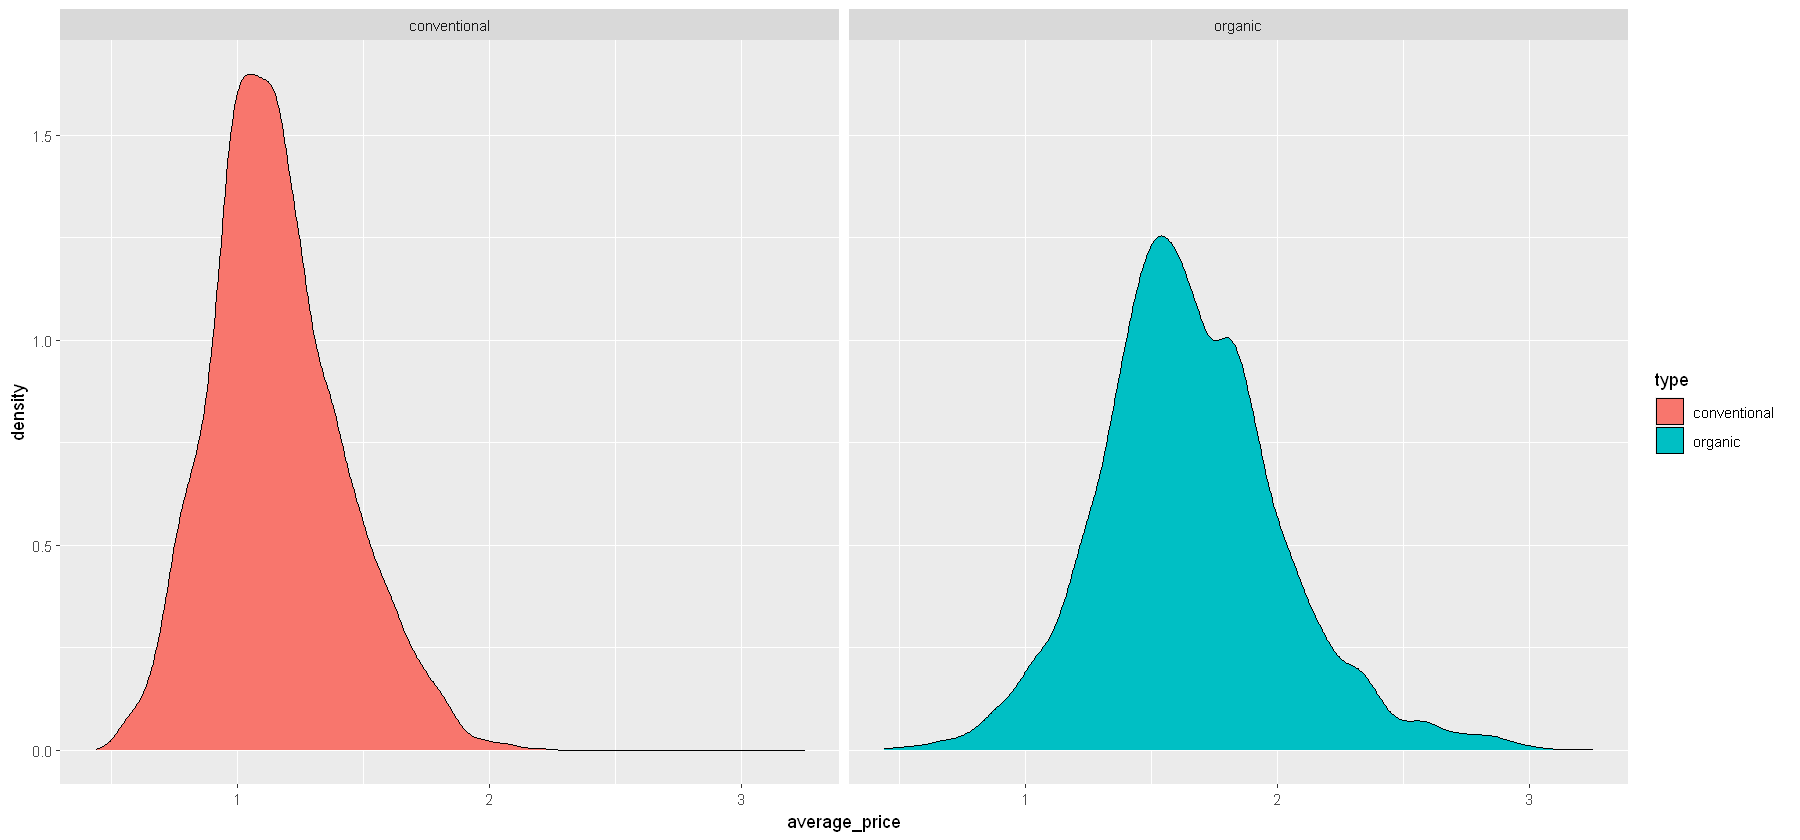

In [8]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data, aes(x=average_price, fill=type)) + 
    geom_density() + 
    facet_grid(~type)

Rozkład dla średnich cen tradycyjnego awokado jest unimodalny oraz w przybliżeniu symetryczny.
Rozkład dla cen organicznego awokado jest bardziej przesunięty w prawo względem tradycyjnego, więc ceny awokado organicznego będą statystycznie wyższe. Zmienna dla awokado organicznego charakteryzuje się również większym odchyleniem standardowym ze względu na większe spłaszczenie wybrzuszenia.  

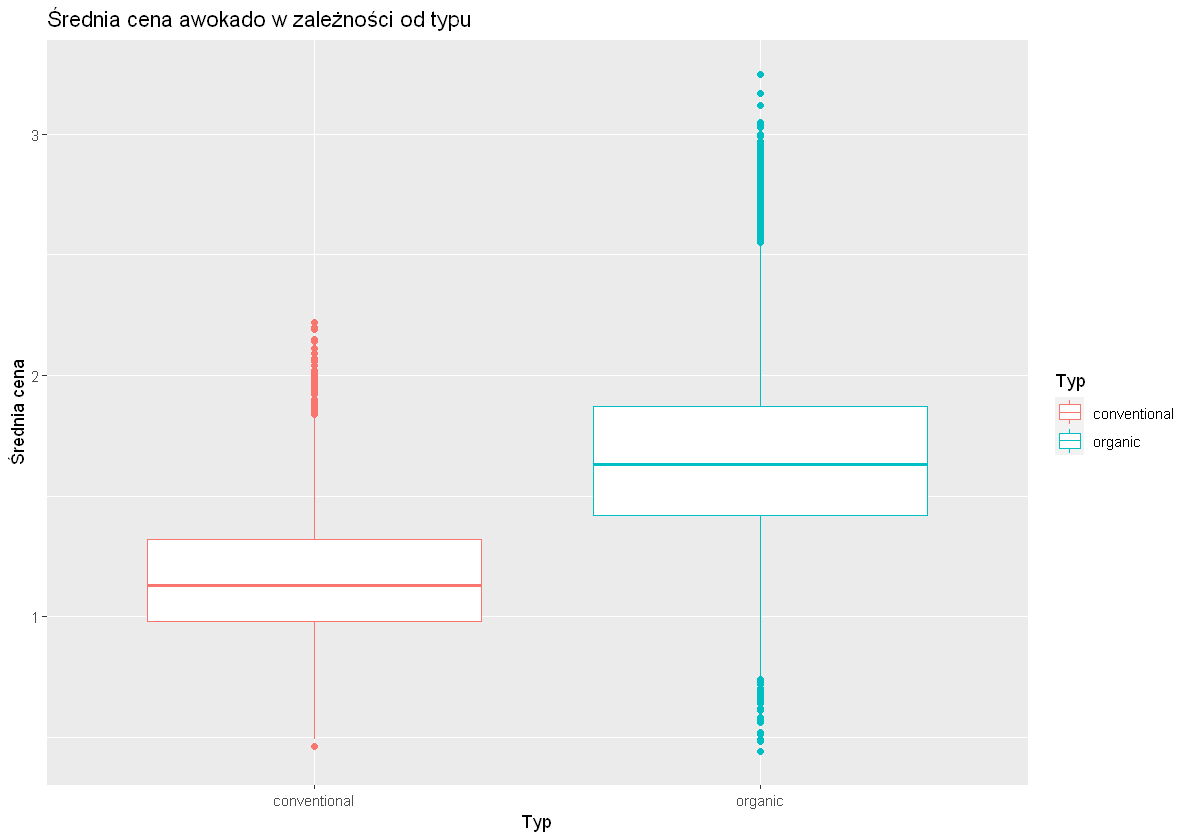

In [9]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(data, aes(type, average_price))+ 
    geom_boxplot(aes(colour = type))+ 
    labs(colour = "Typ", x = "Typ", y ="Średnia cena", title = "Średnia cena awokado w zależności od typu")

Te same dane przedstawione w inny sposób. Wykres pudełkowy wyraźnie przedstawia wyższą cenę owocu organicznego. 

In [10]:
avocado_conventional <- data[data$type == 'conventional', ]
avocado_organic <- data[data$type == 'organic', ]


comparison <- matrix(c(mean(avocado_conventional$average_price), mean(avocado_organic$average_price),
                    median(avocado_conventional$average_price), median(avocado_organic$average_price),
                    var(avocado_conventional$average_price), var(avocado_organic$average_price)), ncol = 2, byrow = TRUE)

colnames(comparison) <- c('Standardowe', 'Organiczne')
rownames(comparison) <- c('Średnia', 'Mediana', 'Wariancja')

comparison

,Standardowe,Organiczne
Średnia,1.15803967,1.6539987
Mediana,1.13000000,1.6300000
Wariancja,0.06919036,0.1321334


Dane w tabeli są potwierdzeniem na powyższe stwierdzenia związane z porównaniem cen w zależności od typu.

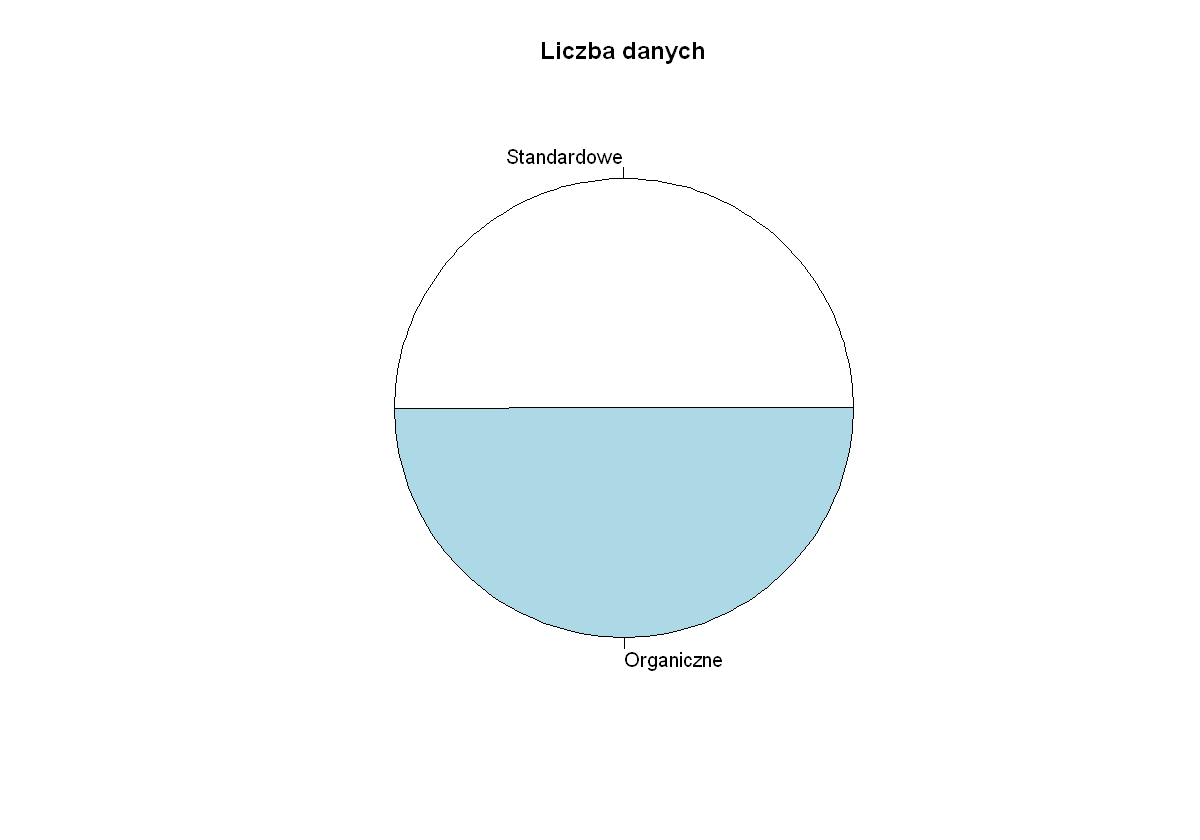

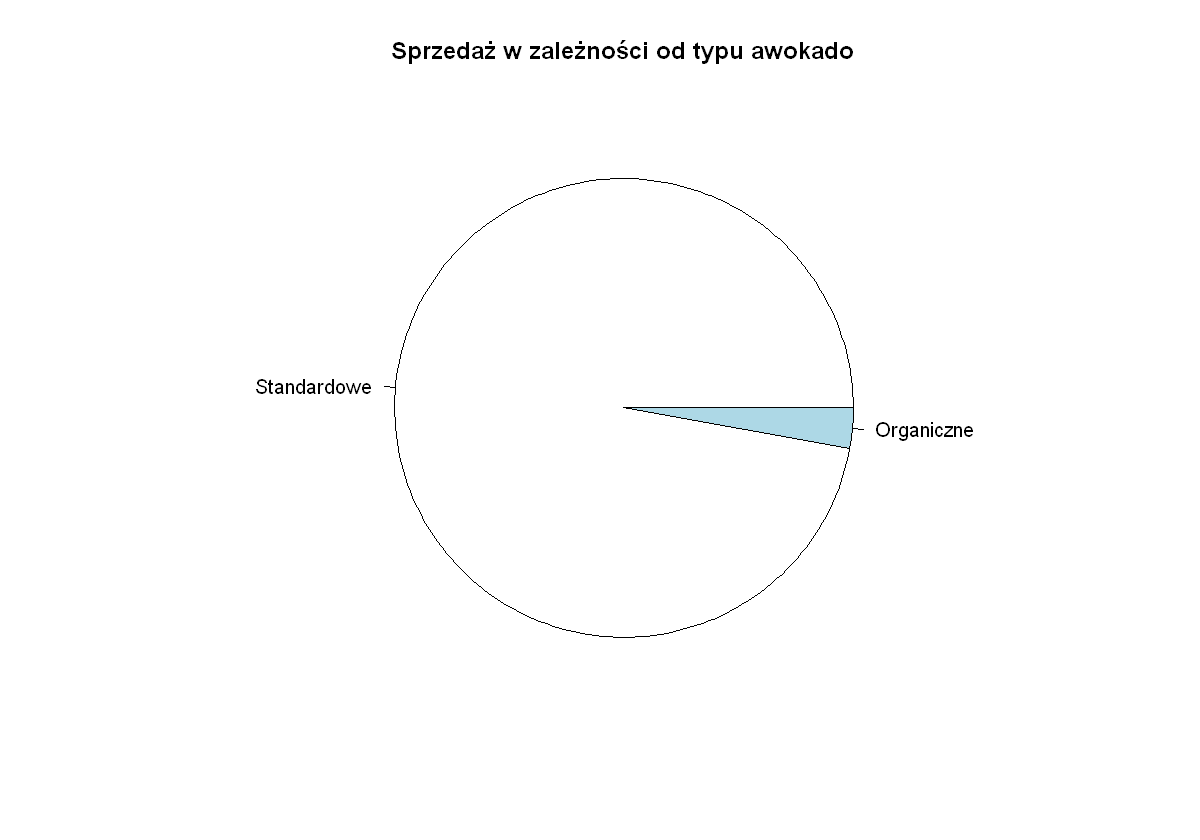

In [11]:
pie_types_values <- c(mean(avocado_conventional$total_volume), mean(avocado_organic$total_volume))
pie_types_labels <- c('Standardowe', 'Organiczne')

pie(c(nrow(avocado_conventional), nrow(avocado_organic)) , pie_types_labels, main = 'Liczba danych')
pie(pie_types_values, pie_types_labels, main = 'Sprzedaż w zależności od typu awokado')

Liczba danych odnośnie awokado organicznego jest porównywalna do tradycyjnego. Co ciekawe, ponad 98% sprzedaży stanowi awokado tradycyjne. 

#### Korelacja zmiennych:

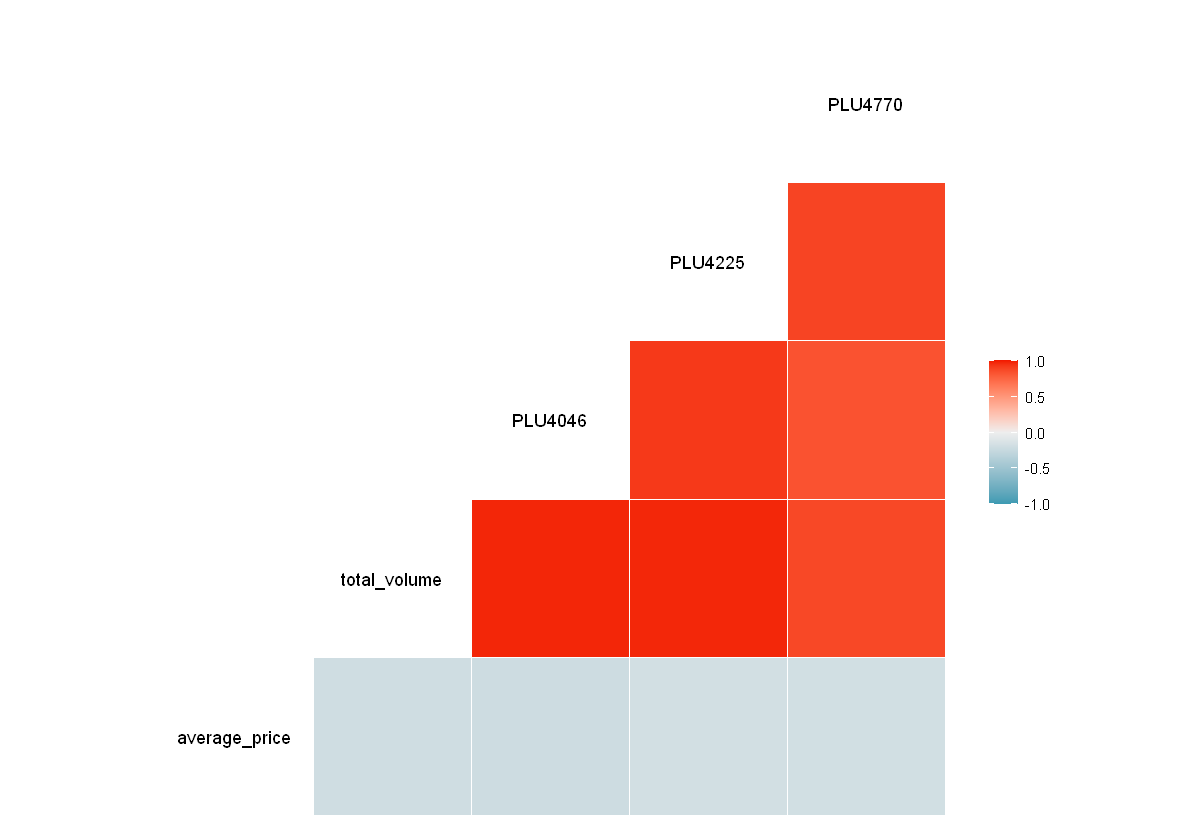

In [12]:
ggcorr(data2, method = c("everything", "pearson"))

Wykres korelacji pokazuje, że zmienne opisujące sprzedaż są ze sobą bardzo silnie skorelowane. Zmienna average_price nie jest skorelowana z żadną inną zmienną. 

## Szereg rozdzielczy

Konstrukcja szeregu rozdzielczego dla zmiennej opisującej średnią cenę awokado. 

Liczbę przedziałów obliczyłam ze wzoru: $k \approx 1 + 3.22 log(n) $ 

Następnie do obliczenia szerokości przedziału zastosowałam wzór: $h \approx \displaystyle\frac{x_{max} - x_{min}}{k} $

In [13]:
average_price <- data$average_price

n = length(average_price)
R = max(average_price) - min(average_price)
k = round( 1 + 3.22 * log(n))
h = round(R/k, 3)

cat('Liczba obserwacji:    ', n, '\n')
cat('Liczba przedziałów:   ', k, '\n')
cat('Szerokość przedziału: ', h, '\n')

table(cut(average_price, breaks = k))
options(repr.plot.width=15, repr.plot.height=7)

Liczba obserwacji:     18249 
Liczba przedziałów:    33 
Szerokość przedziału:  0.085 



(0.437,0.525]  (0.525,0.61]  (0.61,0.695] (0.695,0.781] (0.781,0.866] 
           13            79           137           412           550 
(0.866,0.951]  (0.951,1.04]   (1.04,1.12]   (1.12,1.21]   (1.21,1.29] 
          941          1329          1539          1458          1478 
  (1.29,1.38]   (1.38,1.46]   (1.46,1.55]   (1.55,1.63]   (1.63,1.72] 
         1248          1458          1337          1339           991 
   (1.72,1.8]    (1.8,1.89]   (1.89,1.97]   (1.97,2.06]   (2.06,2.14] 
          949           817           631           390           342 
  (2.14,2.23]   (2.23,2.31]    (2.31,2.4]    (2.4,2.48]   (2.48,2.57] 
          213           171           140            73            46 
  (2.57,2.65]   (2.65,2.74]   (2.74,2.82]   (2.82,2.91]   (2.91,2.99] 
           60            31            27            28            14 
  (2.99,3.08]   (3.08,3.16]   (3.16,3.25] 
            5             1             2 

Histogram dla obliczonej wyżej szerokości przedziału:

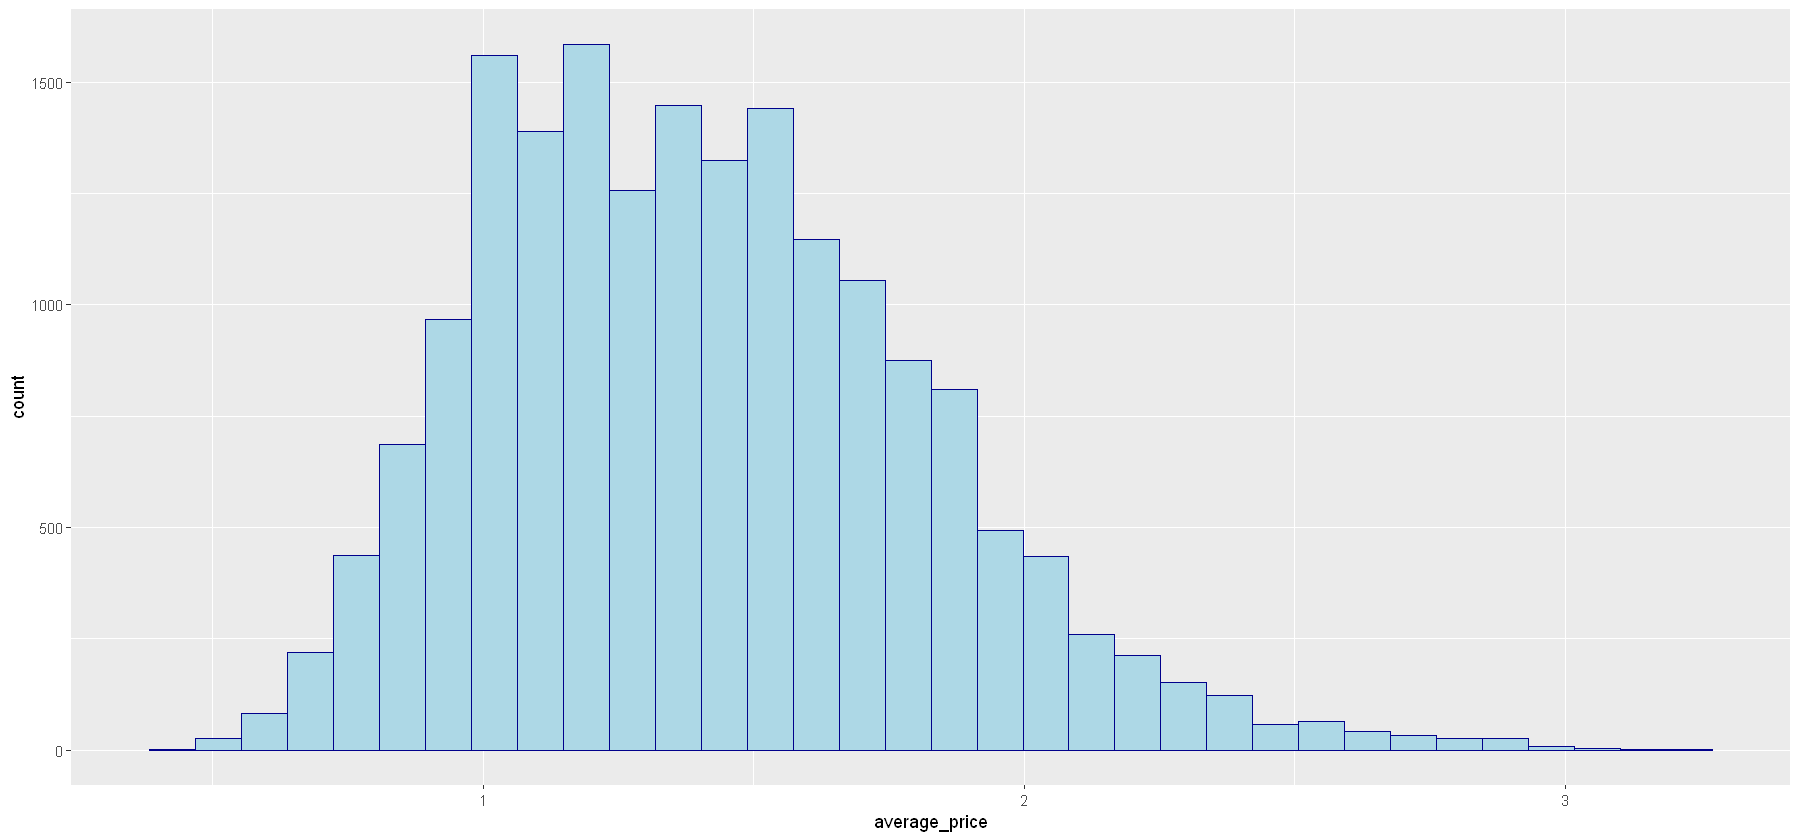

In [14]:
ggplot(data, aes(x=average_price))+
    geom_histogram(color="darkblue", fill="lightblue", binwidth = h)

## Próba statystyczna

Za pomocą poniższej komendy stworzyłam próbkę generowaną losowo o wielkości 100 rekordów. 

In [15]:
data_sample = data2[sample(0:nrow(data2), 100), ]

Obliczę teraz podstawowe statystyki opisowe dla próbki losowej: 

In [33]:
descriptive_statistics_sample <- data.frame(row.names = c('Minimum', 'Maksimum', 'Rozstęp', 'Mediana', 'Średnia', 'Odchylenie standardowe', 'Wariancja'))

for (item in colnames(data_sample)) {
    x <- data_sample[, item]    
    min <- round(min(x), 3)
    max <- round(max(x), 3)
    range <- max - min
    median <- round(median(x),3)
    mean <- round(mean(x), 3)
    variance <- round(var(x), 3)
    standard_deviation <- round(sqrt(variance), 3)
        
    descriptive_statistics_sample[, item] <- c(min, max, range, median, mean, standard_deviation, variance)
}

descriptive_statistics_sample

,average_price,total_volume,PLU4046,PLU4225,PLU4770
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Minimum,0.600,8.106100e+02,0.000000e+00,4.194000e+01,0.000000e+00
Maksimum,2.390,3.205159e+07,1.104213e+07,9.774988e+06,4.002510e+05
Rozstęp,1.790,3.205078e+07,1.104213e+07,9.774946e+06,4.002510e+05
Mediana,1.395,1.784536e+05,1.447356e+04,5.400032e+04,4.737350e+02
Średnia,1.387,1.111523e+06,3.954665e+05,3.561903e+05,2.404352e+04
Odchylenie standardowe,0.421,3.538574e+06,1.301858e+06,1.073812e+06,5.879244e+04
Wariancja,0.177,1.252151e+13,1.694834e+12,1.153072e+12,3.456551e+09


## Test statystyczny

**Czy średnia cena awokado jest niższa niż 1.5?** 

Ze względu na dużą próbę oraz znaną wariancję użyję **testu Z**. Zakładam, że rozkład jest normalny.  
Będzie to lewostronny test na poziomie istotności $\alpha = 0.05$. 

$H_0$: $\mu = 1.5$ <br>
$H_1$: $\mu < 1.5$

Wzór na statystykę:     $Z = \displaystyle\frac{\bar{X}-\mu_{0}}{\frac{\sigma}{\sqrt{n}}}$

<!-- wybrany test statystyczny wraz z przyjętymi założeniami/sprawdzeniem założeń i uzasadnieniem wyboru danego testu, hipotezę badawczą, układ hipotez statystycznych do zweryfikowania, przyjęty poziom istotności, wartość statystyki testowej, decyzję o hipotezach i komentarz. -->

In [35]:
alpha <- 0.05
mi <- 1.5

z_average_price = (mean(data_sample$average_price) - mi) / sqrt(var(data$average_price) / length(data_sample$average_price))

z_kr <- qnorm(alpha)

cat('Przedział krytyczny: ( -inf ;', round(z_kr, 3), ') \n')
cat('Wartość statystyki:     ', round(z_average_price, 3) ,'\n\n')

if(z_average_price < z_kr){
    cat('Wartość statystyki zawiera się w obszarze krytycznym, dlatego należy odrzucić hipotezę zerową na rzecz hipotezy alternatywnej. \nŚrednia cena awokado jest niższa niż', mi, '\n')
}else{
    cat('Wartość statystyki nie zawiera się w obszarze krytycznym, dlatego nie ma podstaw do odrzucenia hipotezy zerowej. \nŚrednia cena awokado nie jest niższa niż', mi, '\n')
}

Przedział krytyczny: ( -inf ; -1.645 ) 
Wartość statystyki:      -2.811 

Wartość statystyki zawiera się w obszarze krytycznym, dlatego należy odrzucić hipotezę zerową na rzecz hipotezy alternatywnej. 
Średnia cena awokado jest niższa niż 1.5 


In [65]:
# z.test(data_sample$average_price, alternative="less", mu=1.5, sqrt(var(data$average_price)), conf.level = .95)

# one.sample.z(data = data_sample$average_price, null.mu = 1.5, sigma = sqrt(var(data$average_price)), alternative="less", conf = 0.95)

# sqrt(var(data$average_price))
# sqrt(var(data_sample$average_price))

<br>

---

## Bibliografia
<ul><li>kaggle.com - Avocado Prices <a href="https://www.kaggle.com/neuromusic/avocado-prices">[Link]</a></li></ul>